<a href="https://colab.research.google.com/github/VictoriaPedrozaAI/Fraud_Detection/blob/main/Fraud_Detection_V5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Libraries

In [2]:
#Libraries Data manipulation and analysis
import pandas as pd
import numpy as np

#Libraries visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Sklearn tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.metrics import  mean_squared_error,classification_report,confusion_matrix, precision_score,accuracy_score,f1_score,recall_score,RocCurveDisplay
from sklearn import metrics
import plotly.express as px
from scipy.stats.mstats import winsorize


#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#warning
import warnings
warnings.filterwarnings ('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML_Fraud_Detection/creditcard.csv')

##Data Preprocessing

In [4]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#finding missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

###  Occurrences of each class

In [11]:
print("\nDistribution of the target variable:")
print(df['Class'].value_counts())


Distribution of the target variable:
Class
0    284315
1       492
Name: count, dtype: int64


### Label data

In [12]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

In [13]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


### information per class

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### The distribution of classes in the dataset


In [16]:
print('Normal', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Normal 99.83 % of the dataset
Frauds 0.17 % of the dataset


### Visualization the distribution of each class


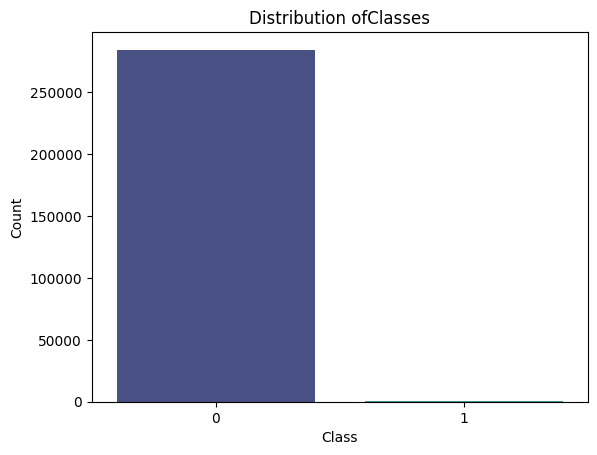

In [17]:
sns.countplot(x='Class', data=df, palette='mako')
plt.title('Distribution ofClasses')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Amount per transaction vs Class

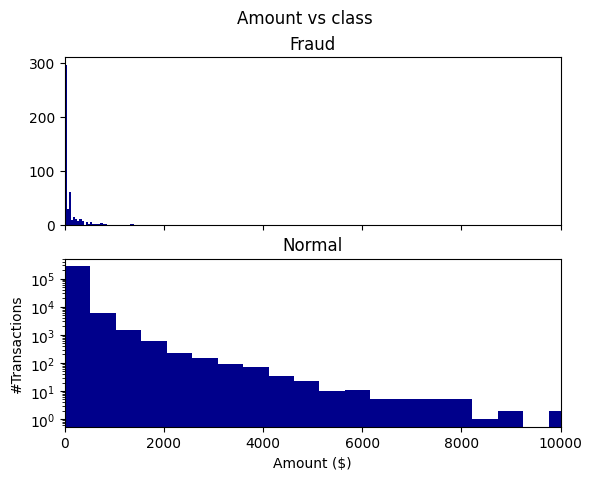

In [18]:
f, (ax1, ax2) = plt.subplots (2,1, sharex =True)
f.suptitle ('Amount vs class')
bins = 50
ax1.hist(fraud.Amount, bins=bins, color='darkblue')
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=bins, color='darkblue')
ax2.set_title('Normal')
plt.xlabel ('Amount ($)')
plt.ylabel ('#Transactions')
plt.xlim((0,10000))
plt.yscale('log')
plt.show()

###Searching for duplicates


In [19]:
duplicate=df.duplicated().sum()
print(f"Total duplicate: {duplicate}")

Total duplicate: 1081


###Dropping duplicates

In [20]:
df.drop_duplicates(inplace=True)
print("Dropping process succesfull")

Dropping process succesfull


In [21]:
df_cap= df.copy()
df_cap.shape

(283726, 31)

In [22]:
#Reviewing the data after the dropping process
df_cap.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [23]:
df_cap.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

### Caping

In [24]:
def percentile_capping_scipy(df_cap, cols, from_low_end, from_high_end):
    for col in cols:

        if np.issubdtype(df_cap[col].dtype, np.number):
            lower_bound = df_cap[col].quantile(from_low_end)
            upper_bound = df_cap[col].quantile(1 - from_high_end)

            df_cap[col] = np.where(df_cap[col] > upper_bound, upper_bound,
                                   np.where(df_cap[col] < lower_bound, lower_bound, df_cap[col]))

# Only numeric columns are sacaled
numeric_cols_to_cap = [col for col in df_cap.columns.tolist() if col != 'Class' and np.issubdtype(df_cap[col].dtype, np.number)]
percentile_capping_scipy(df_cap, numeric_cols_to_cap, 0.05, 0.05)
print("Percentile capping applied to all numeric features.")

Percentile capping applied to all numeric features.


In [25]:
df_cap.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    95360.573960       0.124138       0.042014       0.042148   
std     45920.667053       1.470403       0.989442       1.254426   
min     25297.000000      -2.881365      -1.973354      -2.386035   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    164138.750000       2.081438       1.796086       2.062083   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.028045       0.004579      -0.007317       0.009733   
std         1.207894       0.986338       1.132127       0.764741   
min        -2.198094      -1.698583      -1.407245      -1.431636   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max         2.556595       2.099693       3.159414       1.407143   

                  V8             V9  ...            V21            V22  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean        0.071611      -0.019888  ...      -0.013929       0.006319   
std         0.459102       0.930435  ...       0.277746       0.645967   
min        -0.839709      -1.759186  ...      -0.503743      -1.081090   
25%        -0.208828      -0.644221  ...      -0.228305      -0.542700   
50%         0.021898      -0.052596  ...      -0.029441       0.006675   
75%         0.325704       0.595977  ...       0.186194       0.528245   
max         1.042342       1.778622  ...       0.537301       1.128988   

                 V23            V24            V25            V26  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.003937       0.007919       0.005437      -0.000663   
std         0.243203       0.551975       0.439669       0.438683   
min        -0.472036      -1.143173      -0.825096      -0.696493   
25%        -0.161703      -0.354453      -0.317485      -0.326763   
50%        -0.011159       0.041016       0.016278      -0.052172   
75%         0.147748       0.439738       0.350667       0.240261   
max         0.488058       0.867555       0.760243       0.921678   

                 V27            V28         Amount          Class  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean        0.010514       0.006674      65.273920       0.001667  
std         0.183362       0.130828      96.470696       0.040796  
min        -0.410548      -0.315265       0.920000       0.000000  
25%        -0.070641      -0.052818       5.600000       0.000000  
50%         0.001479       0.011288      22.000000       0.000000  
75%         0.091208       0.078276      77.510000       0.000000  
max         0.387754       0.255770     365.337500       1.000000  

[8 rows x 31 columns]

### Target variable


In [26]:
y = df_cap['Class'].values
X = df_cap.drop(columns=['Class'])

In [27]:
X = X.drop(columns=['Time'])

### Split Train and Test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [29]:
# checking the shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226980, 29), (56746, 29), (226980,), (56746,))

In [30]:
X_train.shape

(226980, 29)

In [31]:
X_test.shape

(56746, 29)

In [32]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.062083  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.488058   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.6200  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.6900  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  365.3375  
3 -1.143173  0.647376 -0.221929  0.062723  0.061458  123.5000  
4  0.141267 -0.206010  0.502292  0.219422  0.215153   69.9900  

[5 rows x 29 columns]

In [33]:
#Subset of the data set with the target variable
class_c= df_cap['Class'].value_counts()
total = class_c.sum()

# Class label map for better readability
classL= {0: "Normal", 1: "Fraud"}
df_cap['classL'] = df_cap['Class'].map(classL)

df_cap

Time        V1        V2        V3        V4        V5        V6  \
0        25297.00 -1.359807 -0.072781  2.062083  1.378155 -0.338321  0.462388   
1        25297.00  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        25297.00 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        25297.00 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        25297.00 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...       ...       ...       ...       ...       ...       ...   
284802  164138.75 -2.881365  1.796086 -2.386035 -2.066656 -1.698583 -1.407245   
284803  164138.75 -0.732789 -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  164138.75  1.919565 -0.301254 -2.386035 -0.557828  2.099693  3.031260   
284805  164138.75 -0.240440  0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  164138.75 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V22       V23       V24  \
0       0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928   
1      -0.078803  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846   
2       0.791461  0.247676 -1.514654  ...  0.771679  0.488058 -0.689281   
3       0.237609  0.377436 -1.387024  ...  0.005274 -0.190321 -1.143173   
4       0.592941 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267   
...          ...       ...       ...  ...       ...       ...       ...   
284802 -1.431636  1.042342  1.778622  ...  0.111864  0.488058 -0.509348   
284803  0.024330  0.294869  0.584800  ...  0.924384  0.012463 -1.016226   
284804 -0.296827  0.708417  0.432454  ...  0.578229 -0.037501  0.640134   
284805 -0.686180  0.679145  0.392087  ...  0.800049 -0.163298  0.123205   
284806  1.407143 -0.414650  0.486180  ...  0.643078  0.376777  0.008797   

             V25       V26       V27       V28    Amount  Class  classL  
0       0.128539 -0.189115  0.133558 -0.021053  149.6200      0  Normal  
1       0.167170  0.125895 -0.008983  0.014724    2.6900      0  Normal  
2      -0.327642 -0.139097 -0.055353 -0.059752  365.3375      0  Normal  
3       0.647376 -0.221929  0.062723  0.061458  123.5000      0  Normal  
4      -0.206010  0.502292  0.219422  0.215153   69.9900      0  Normal  
...          ...       ...       ...       ...       ...    ...     ...  
284802  0.760243  0.250034  0.387754  0.255770    0.9200      0  Normal  
284803 -0.606624 -0.395255  0.068472 -0.053527   24.7900      0  Normal  
284804  0.265745 -0.087371  0.004455 -0.026561   67.8800      0  Normal  
284805 -0.569159  0.546668  0.108821  0.104533   10.0000      0  Normal  
284806 -0.473649 -0.696493 -0.002415  0.013649  217.0000      0  Normal  

[283726 rows x 32 columns]

## Scale X

In [34]:
scaler = StandardScaler()

In [35]:
X_scaled = scaler.fit_transform(X)

In [36]:
X_train_s = scaler.fit_transform(X_train)

In [37]:
X_test_s = scaler.transform(X_test)

# SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_s, y_train)

In [39]:
import pandas as pd

print(pd.Series(y_train).value_counts())
print(pd.Series(y_train_resampled).value_counts())

0    226597
1       383
Name: count, dtype: int64
0    226597
1    226597
Name: count, dtype: int64


## Plots of features to detect outliers

### Bloxplots outliers and skewness

In [40]:
df_raw=df.copy()

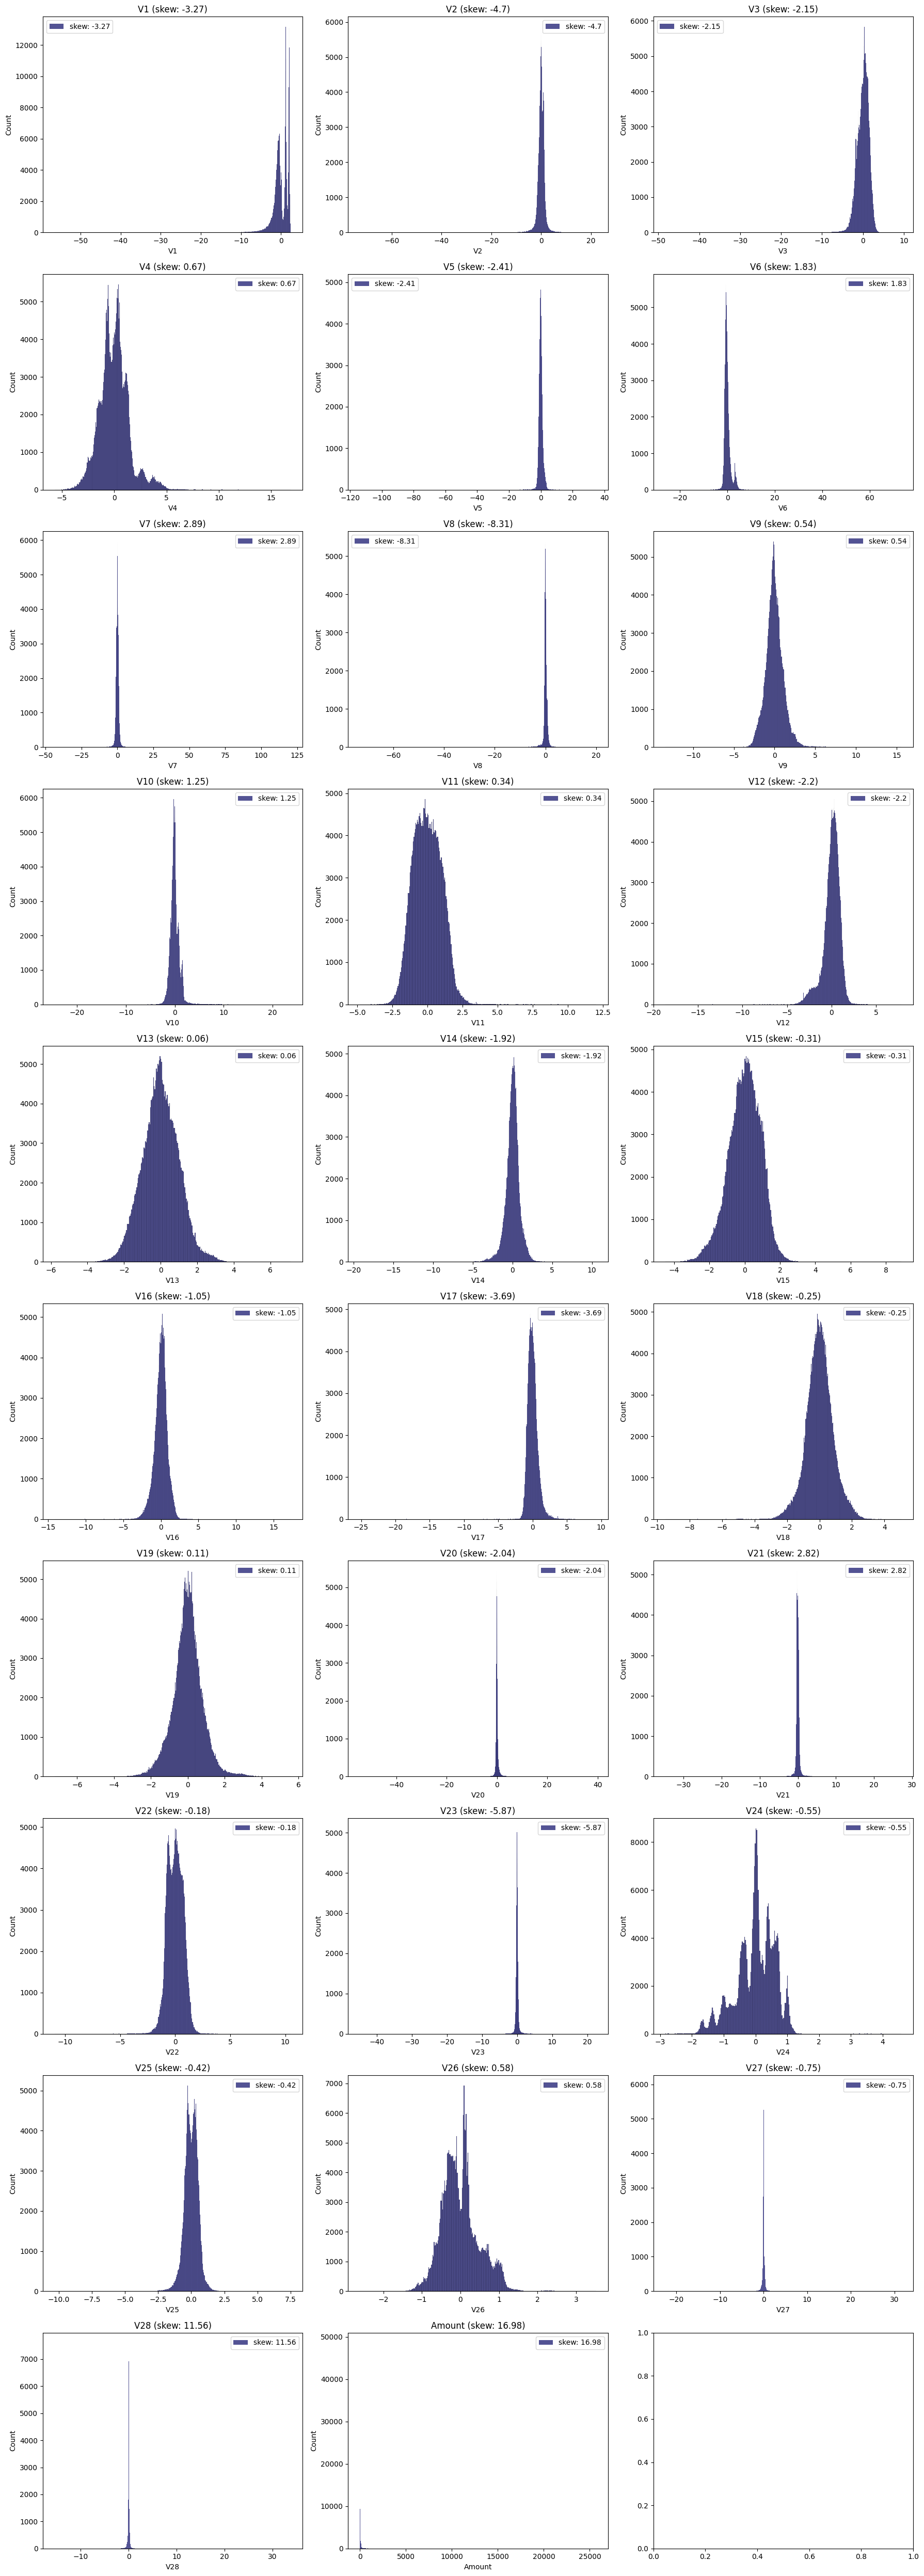

In [41]:
v_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
plots_per_row = 3
num_cols = plots_per_row
num_rows = int(np.ceil(len(v_columns) / plots_per_row))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(v_columns):
    sns.histplot(df_raw[col], color='midnightblue', ax=axes[i])
    skew_val = np.round(df_raw[col].skew(), 2)
    axes[i].set_title(f'{col} (skew: {skew_val})')
    axes[i].legend([f'skew: {skew_val}'])

plt.tight_layout()
plt.show()

### Boxplots Features vs Class


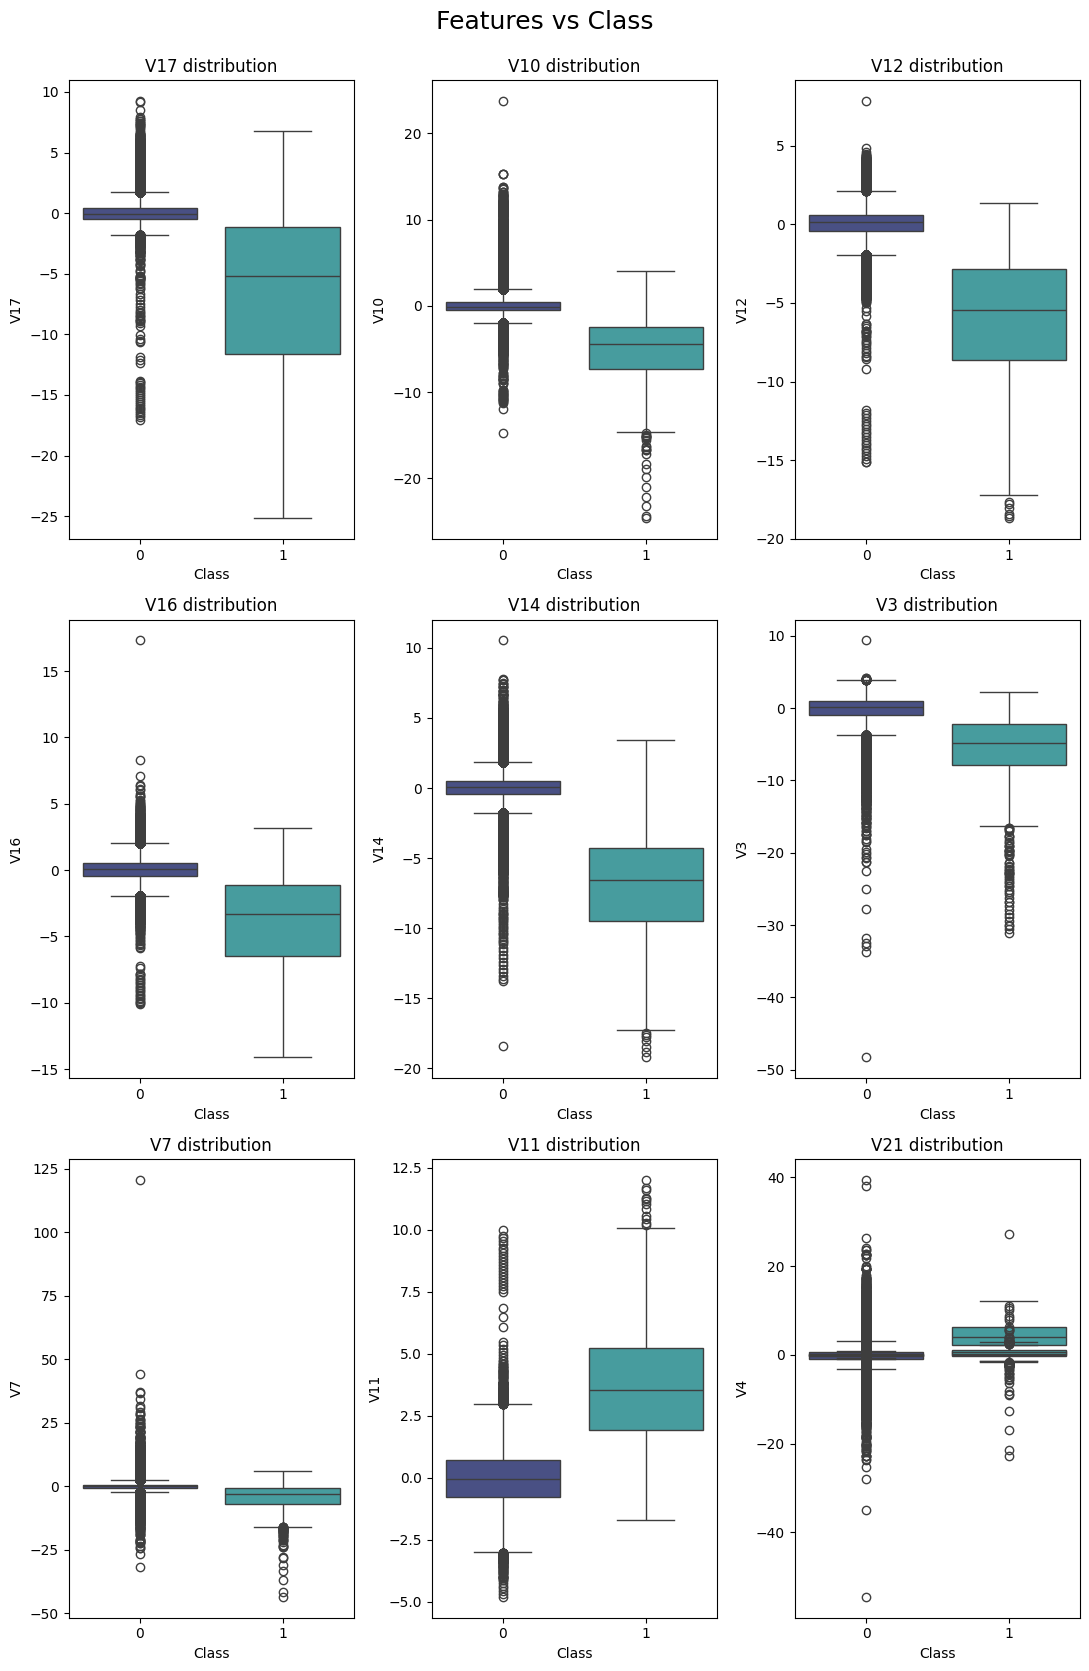

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df_raw, x='Class', y='V17', palette='mako')
axes[0,0].set_title("V17 distribution");

sns.boxplot(ax=axes[0, 1], data=df_raw, x='Class', y='V10', palette='mako')
axes[0,1].set_title("V10 distribution");

sns.boxplot(ax=axes[0, 2], data=df_raw, x='Class', y='V12', palette='mako')
axes[0,2].set_title("V12 distribution");

sns.boxplot(ax=axes[1, 0], data=df_raw, x='Class', y='V16', palette='mako')
axes[1,0].set_title("V16 distribution");

sns.boxplot(ax=axes[1, 1], data=df_raw, x='Class', y='V14', palette='mako')
axes[1,1].set_title("V14 distribution");

sns.boxplot(ax=axes[1, 2], data=df_raw, x='Class', y='V3', palette='mako')
axes[1,2].set_title("V3 distribution");

sns.boxplot(ax=axes[2, 0], data=df_raw, x='Class', y='V7', palette='mako')
axes[2,0].set_title("V7 distribution");

sns.boxplot(ax=axes[2, 1], data=df_raw, x='Class', y='V11', palette='mako')
axes[2,1].set_title("V11 distribution");

sns.boxplot(ax=axes[2, 2], data=df_raw, x='Class', y='V4', palette='mako')
axes[2,2].set_title("V4 distribution");

sns.boxplot(ax=axes[2, 2], data=df_raw, x='Class', y='V20', palette='mako')
axes[2,2].set_title("V20 distribution");

sns.boxplot(ax=axes[2, 2], data=df_raw, x='Class', y='V21', palette='mako')
axes[2,2].set_title("V21 distribution");

plt.tight_layout()

## Plots after scaling

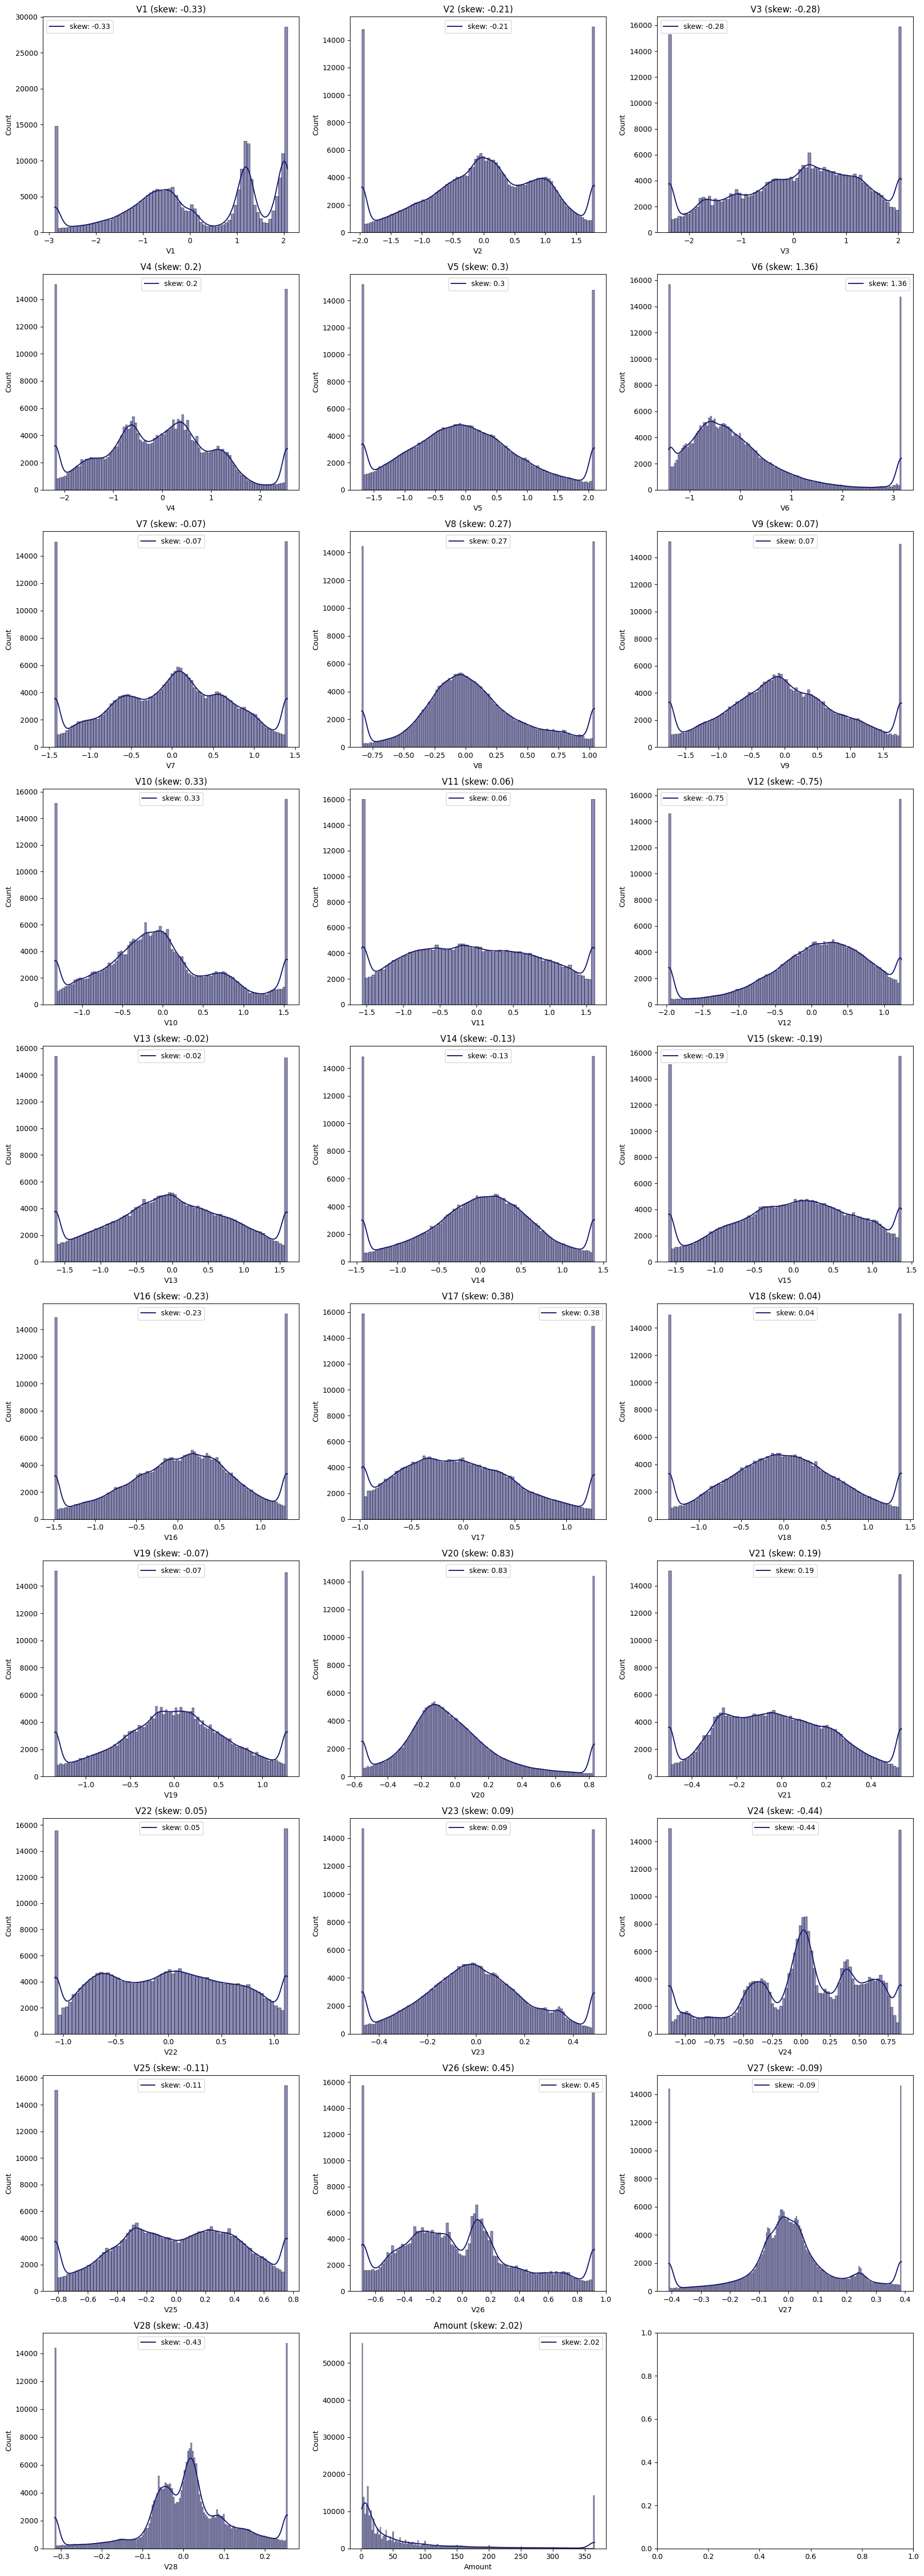

In [43]:
v_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
plots_per_row = 3
num_cols = plots_per_row
num_rows = int(np.ceil(len(v_columns) / plots_per_row))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(v_columns):
    sns.histplot(df_cap[col], kde=True, color='midnightblue', ax=axes[i])
    skew_val = np.round(df_cap[col].skew(), 2)
    axes[i].set_title(f'{col} (skew: {skew_val})')
    axes[i].legend([f'skew: {skew_val}'])

plt.tight_layout()
plt.show()

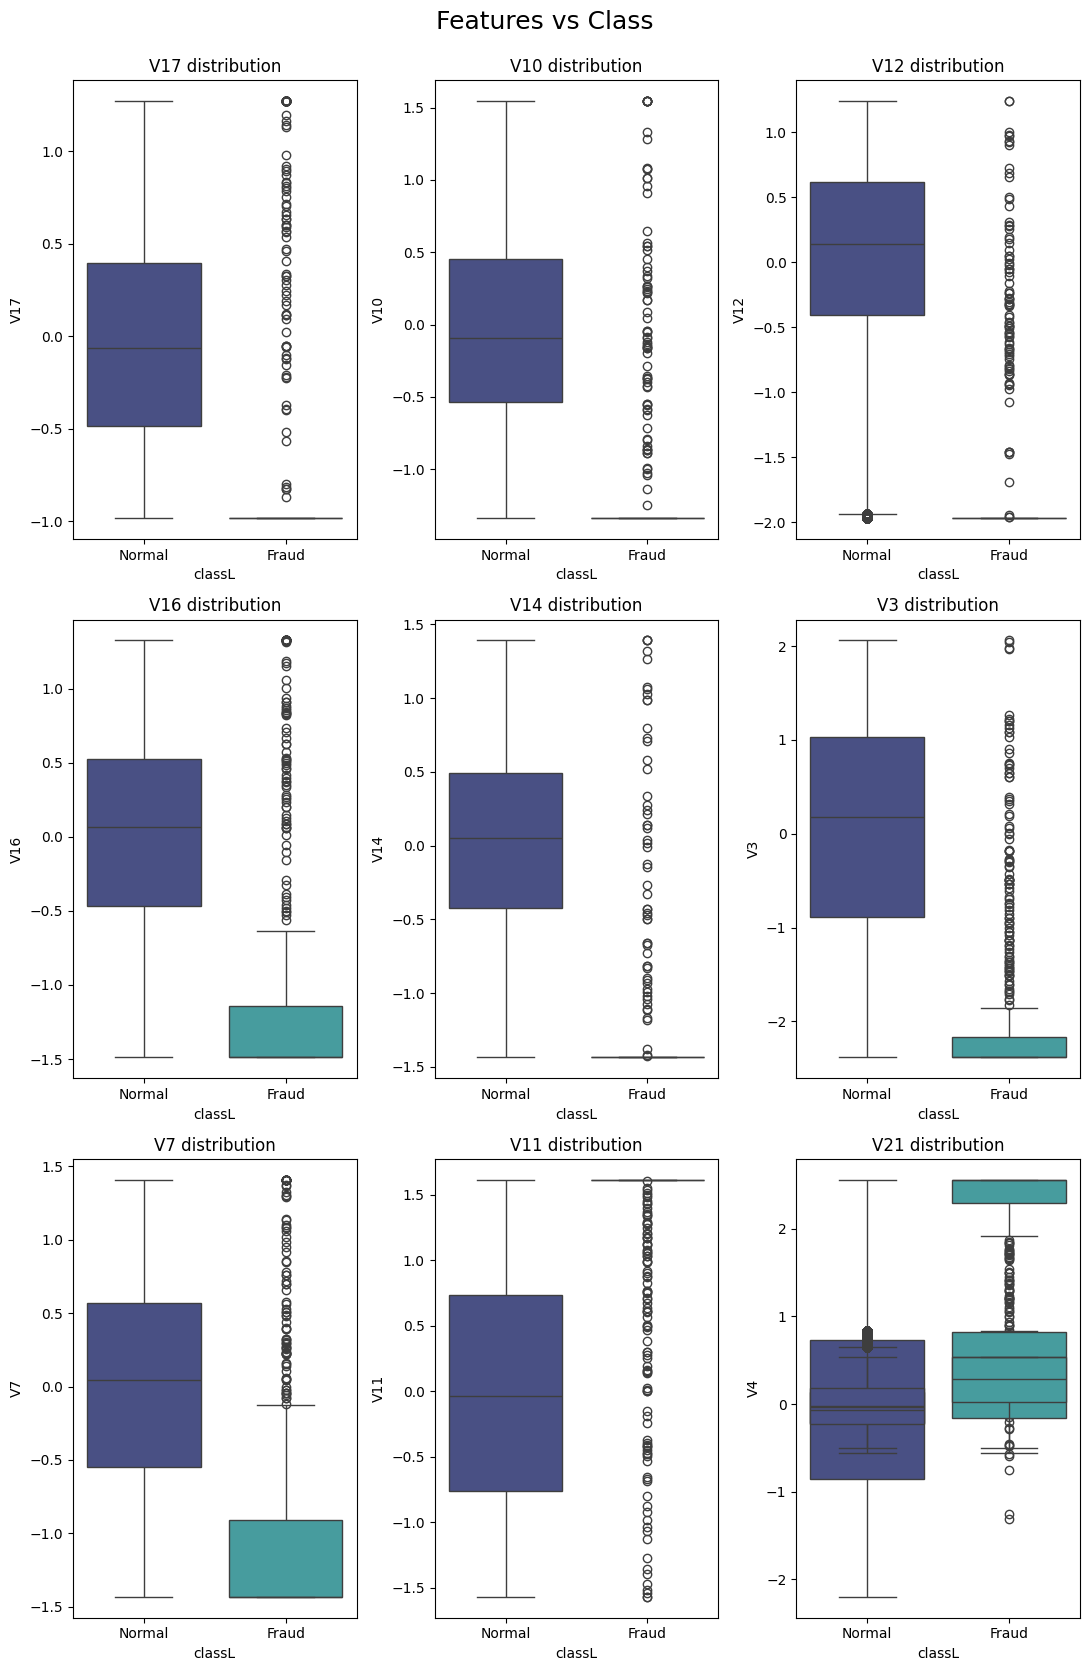

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df_cap, x='classL', y='V17', palette='mako')
axes[0,0].set_title("V17 distribution");

sns.boxplot(ax=axes[0, 1], data=df_cap, x='classL', y='V10', palette='mako')
axes[0,1].set_title("V10 distribution");

sns.boxplot(ax=axes[0, 2], data=df_cap, x='classL', y='V12', palette='mako')
axes[0,2].set_title("V12 distribution");

sns.boxplot(ax=axes[1, 0], data=df_cap, x='classL', y='V16', palette='mako')
axes[1,0].set_title("V16 distribution");

sns.boxplot(ax=axes[1, 1], data=df_cap, x='classL', y='V14', palette='mako')
axes[1,1].set_title("V14 distribution");

sns.boxplot(ax=axes[1, 2], data=df_cap, x='classL', y='V3', palette='mako')
axes[1,2].set_title("V3 distribution");

sns.boxplot(ax=axes[2, 0], data=df_cap, x='classL', y='V7', palette='mako')
axes[2,0].set_title("V7 distribution");

sns.boxplot(ax=axes[2, 1], data=df_cap, x='classL', y='V11', palette='mako')
axes[2,1].set_title("V11 distribution");

sns.boxplot(ax=axes[2, 2], data=df_cap, x='classL', y='V4', palette='mako')
axes[2,2].set_title("V4 distribution");

sns.boxplot(ax=axes[2, 2], data=df_cap, x='classL', y='V20', palette='mako')
axes[2,2].set_title("V20 distribution");

sns.boxplot(ax=axes[2, 2], data=df_cap, x='classL', y='V21', palette='mako')
axes[2,2].set_title("V21 distribution");

plt.tight_layout()

### Mean values per Features and Class

In [45]:
df_cap.groupby('classL').mean()

Time        V1        V2        V3        V4        V5  \
classL                                                                   
Fraud   81908.321882 -1.550730  1.268884 -1.937271  2.192587 -0.671321   
Normal  95383.037677  0.126935  0.039966  0.045453 -0.031754  0.005708   

              V6        V7        V8        V9  ...       V21       V22  \
classL                                          ...                       
Fraud  -0.795582 -0.955844  0.382668 -1.201284  ...  0.266022  0.047183   
Normal -0.006001  0.011345  0.071092 -0.017916  ... -0.014396  0.006251   

             V23       V24       V25       V26       V27       V28     Amount  \
classL                                                                          
Fraud  -0.030563 -0.100008  0.047054  0.048321  0.154692  0.064611  83.913140   
Normal -0.003893  0.008100  0.005368 -0.000745  0.010273  0.006577  65.242795   

        Class  
classL         
Fraud     1.0  
Normal    0.0  

[2 rows x 31 columns]

## Correlation Matrix

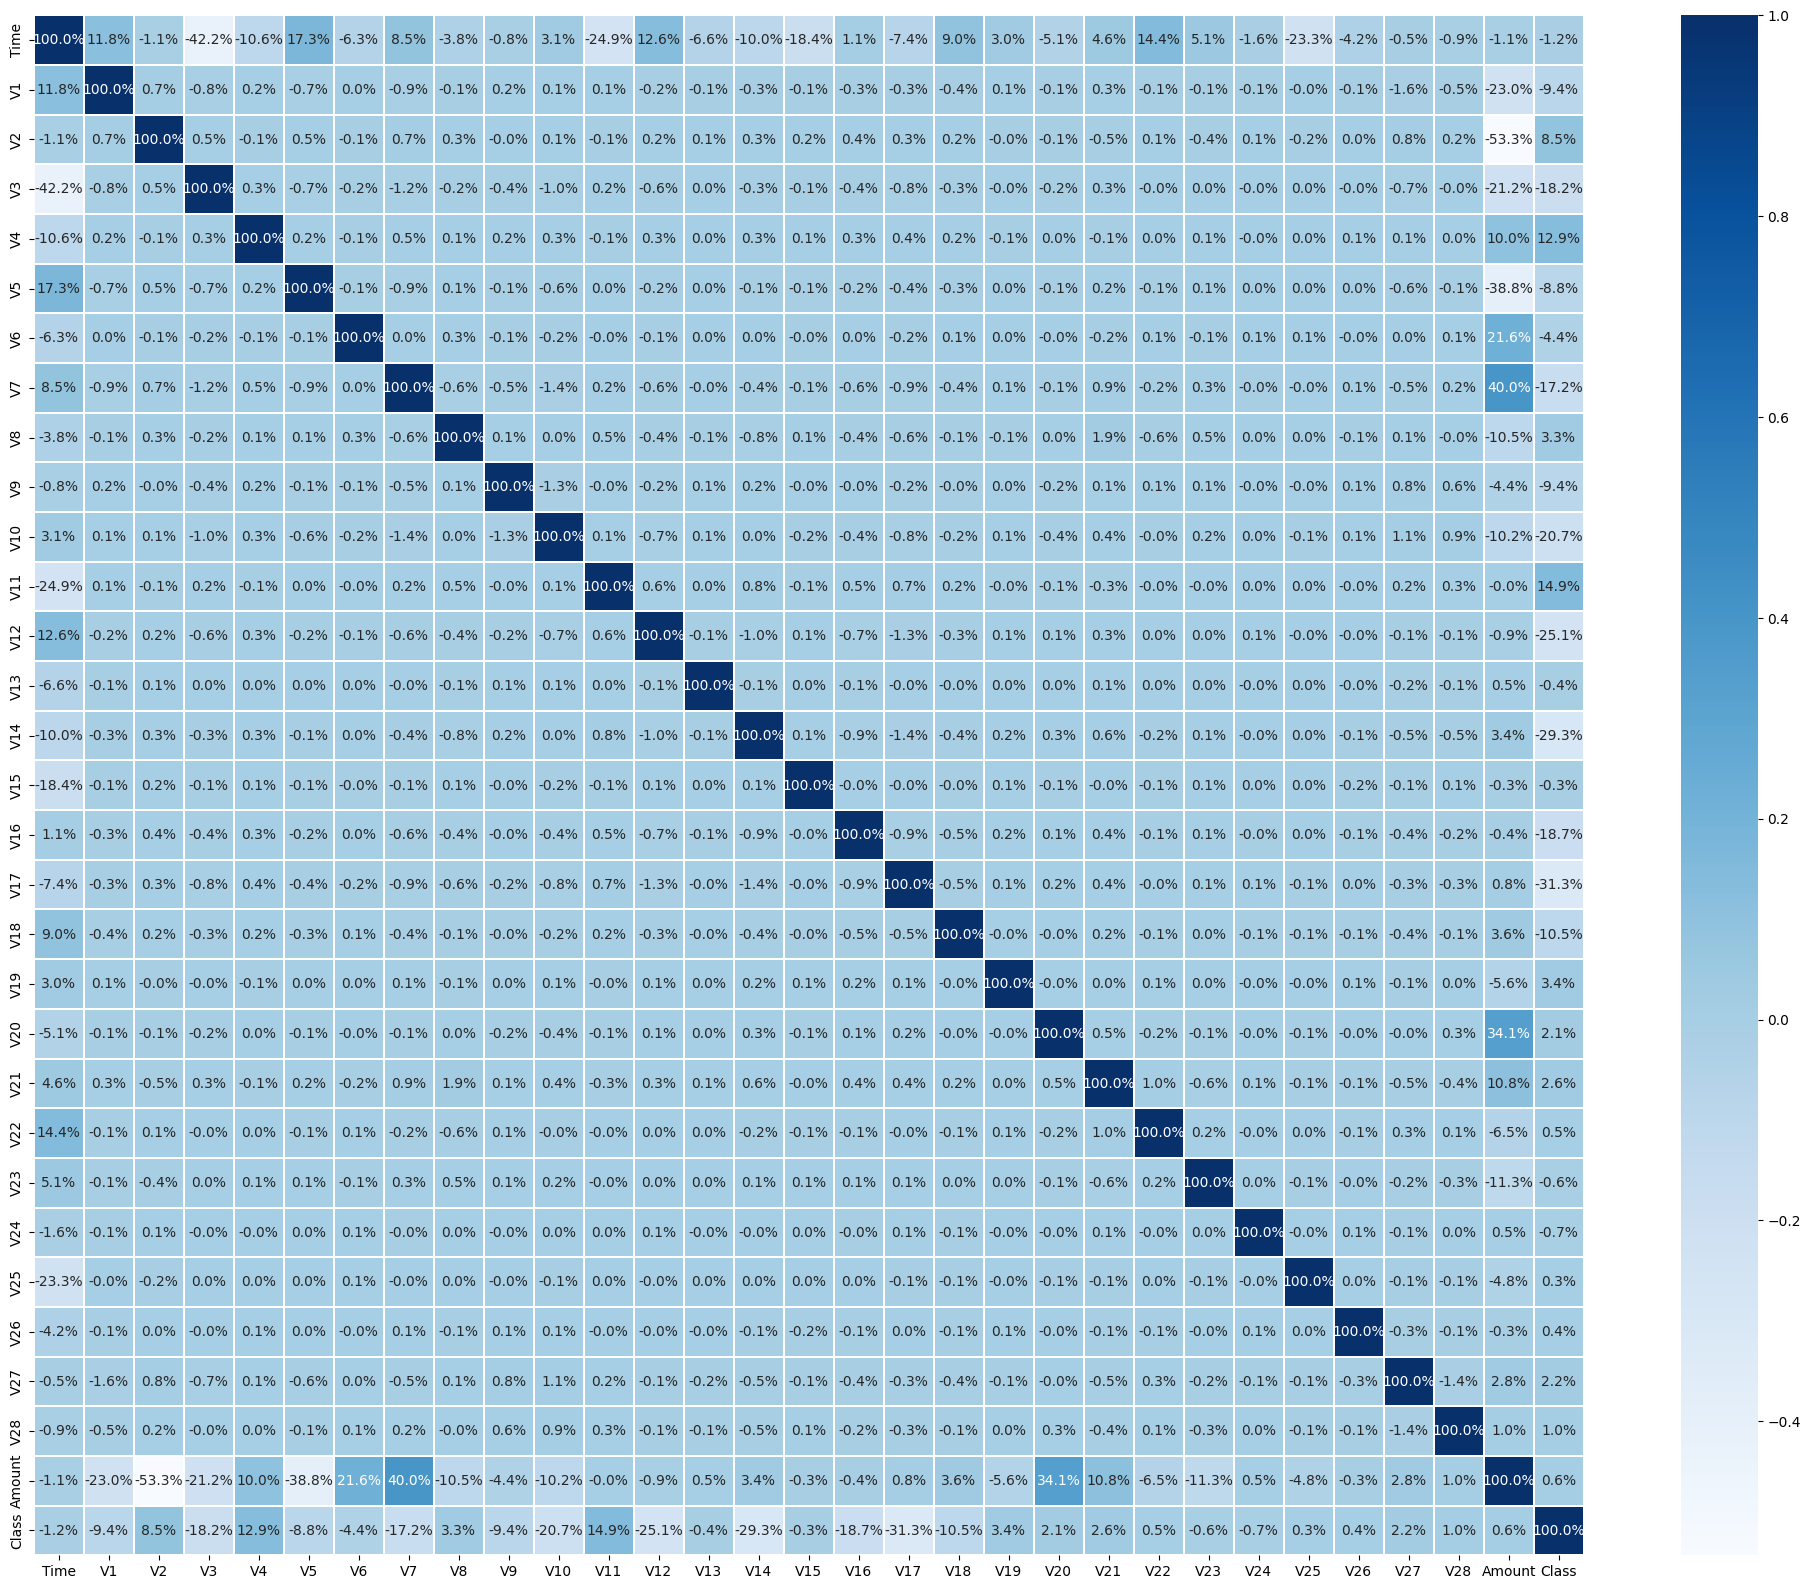

In [46]:
#Heatmap of features with percentage vs target variable
plt.figure(figsize=(25, 20))
cmap =plt.get_cmap('Blues')
sns.heatmap(df.corr(), annot=True, fmt='.1%',  linewidths=.09, cmap=cmap);

### Features selected

In [47]:
features_f = ['V2','V4', 'V6', 'V7','V8','V11', 'V14', 'V18','V19','V20', 'V21', 'V27', 'V28', 'Amount']

### Heatmap of features selected

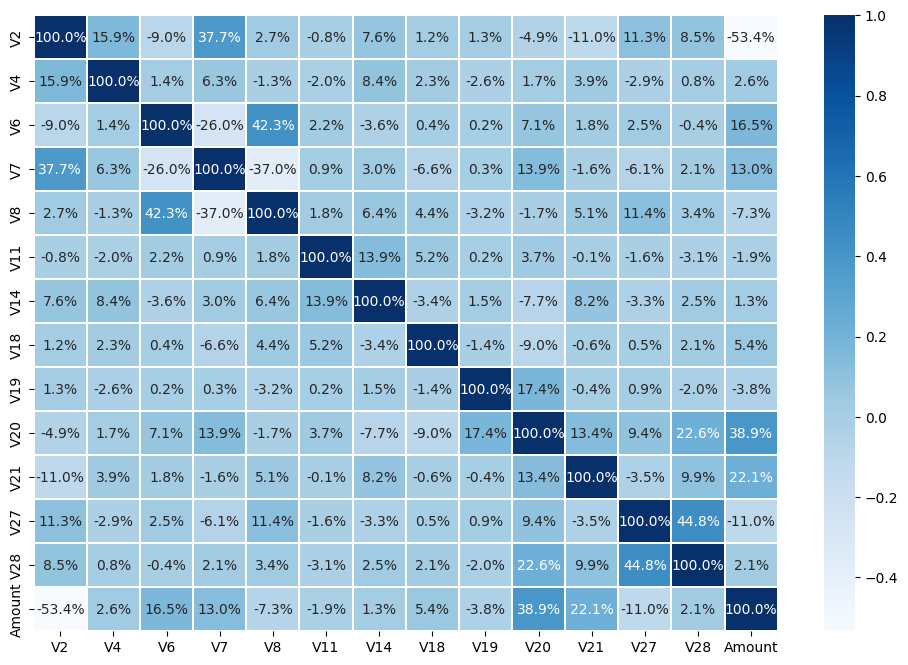

In [48]:
#Heatmap of the features selected based on the results of the correlation matrix before
plt.figure(figsize=(12, 8))
cmap =plt.get_cmap('Blues')
sns.heatmap(df_cap[features_f].corr(), annot=True, fmt='.1%',  linewidths=.08, cmap=cmap);

### Subset of the data set with the target variable

In [49]:
df_clean=df_cap.copy()

In [50]:
df_clean.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    95360.573960       0.124138       0.042014       0.042148   
std     45920.667053       1.470403       0.989442       1.254426   
min     25297.000000      -2.881365      -1.973354      -2.386035   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    164138.750000       2.081438       1.796086       2.062083   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.028045       0.004579      -0.007317       0.009733   
std         1.207894       0.986338       1.132127       0.764741   
min        -2.198094      -1.698583      -1.407245      -1.431636   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max         2.556595       2.099693       3.159414       1.407143   

                  V8             V9  ...            V21            V22  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean        0.071611      -0.019888  ...      -0.013929       0.006319   
std         0.459102       0.930435  ...       0.277746       0.645967   
min        -0.839709      -1.759186  ...      -0.503743      -1.081090   
25%        -0.208828      -0.644221  ...      -0.228305      -0.542700   
50%         0.021898      -0.052596  ...      -0.029441       0.006675   
75%         0.325704       0.595977  ...       0.186194       0.528245   
max         1.042342       1.778622  ...       0.537301       1.128988   

                 V23            V24            V25            V26  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.003937       0.007919       0.005437      -0.000663   
std         0.243203       0.551975       0.439669       0.438683   
min        -0.472036      -1.143173      -0.825096      -0.696493   
25%        -0.161703      -0.354453      -0.317485      -0.326763   
50%        -0.011159       0.041016       0.016278      -0.052172   
75%         0.147748       0.439738       0.350667       0.240261   
max         0.488058       0.867555       0.760243       0.921678   

                 V27            V28         Amount          Class  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean        0.010514       0.006674      65.273920       0.001667  
std         0.183362       0.130828      96.470696       0.040796  
min        -0.410548      -0.315265       0.920000       0.000000  
25%        -0.070641      -0.052818       5.600000       0.000000  
50%         0.001479       0.011288      22.000000       0.000000  
75%         0.091208       0.078276      77.510000       0.000000  
max         0.387754       0.255770     365.337500       1.000000  

[8 rows x 31 columns]

In [51]:
df_clean.head()

Time        V1        V2        V3        V4        V5        V6  \
0  25297.0 -1.359807 -0.072781  2.062083  1.378155 -0.338321  0.462388   
1  25297.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2  25297.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3  25297.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4  25297.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V22       V23       V24       V25  \
0  0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539   
1 -0.078803  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.791461  0.247676 -1.514654  ...  0.771679  0.488058 -0.689281 -0.327642   
3  0.237609  0.377436 -1.387024  ...  0.005274 -0.190321 -1.143173  0.647376   
4  0.592941 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28    Amount  Class  classL  
0 -0.189115  0.133558 -0.021053  149.6200      0  Normal  
1  0.125895 -0.008983  0.014724    2.6900      0  Normal  
2 -0.139097 -0.055353 -0.059752  365.3375      0  Normal  
3 -0.221929  0.062723  0.061458  123.5000      0  Normal  
4  0.502292  0.219422  0.215153   69.9900      0  Normal  

[5 rows x 32 columns]

In [52]:
df_clean.tail()

Time        V1        V2        V3        V4        V5        V6  \
284802  164138.75 -2.881365  1.796086 -2.386035 -2.066656 -1.698583 -1.407245   
284803  164138.75 -0.732789 -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  164138.75  1.919565 -0.301254 -2.386035 -0.557828  2.099693  3.031260   
284805  164138.75 -0.240440  0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  164138.75 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V22       V23       V24  \
284802 -1.431636  1.042342  1.778622  ...  0.111864  0.488058 -0.509348   
284803  0.024330  0.294869  0.584800  ...  0.924384  0.012463 -1.016226   
284804 -0.296827  0.708417  0.432454  ...  0.578229 -0.037501  0.640134   
284805 -0.686180  0.679145  0.392087  ...  0.800049 -0.163298  0.123205   
284806  1.407143 -0.414650  0.486180  ...  0.643078  0.376777  0.008797   

             V25       V26       V27       V28  Amount  Class  classL  
284802  0.760243  0.250034  0.387754  0.255770    0.92      0  Normal  
284803 -0.606624 -0.395255  0.068472 -0.053527   24.79      0  Normal  
284804  0.265745 -0.087371  0.004455 -0.026561   67.88      0  Normal  
284805 -0.569159  0.546668  0.108821  0.104533   10.00      0  Normal  
284806 -0.473649 -0.696493 -0.002415  0.013649  217.00      0  Normal  

[5 rows x 32 columns]

# Feature distribution

In [53]:
import pandas as pd
y_test_df = pd.DataFrame(y_test, columns=['Class'], index=X_test.index)
data_val = pd.concat([X_test, y_test_df], axis=1)
data_val['classL'] = data_val['Class'].map(classL)


In [54]:
data_val_0 = data_val[data_val['Class'] == 0]
data_val_1 = data_val[data_val['Class'] == 1]

In [55]:
import math
cols = features_f
ncols = 3
nrows = math.ceil(len(cols) / ncols)

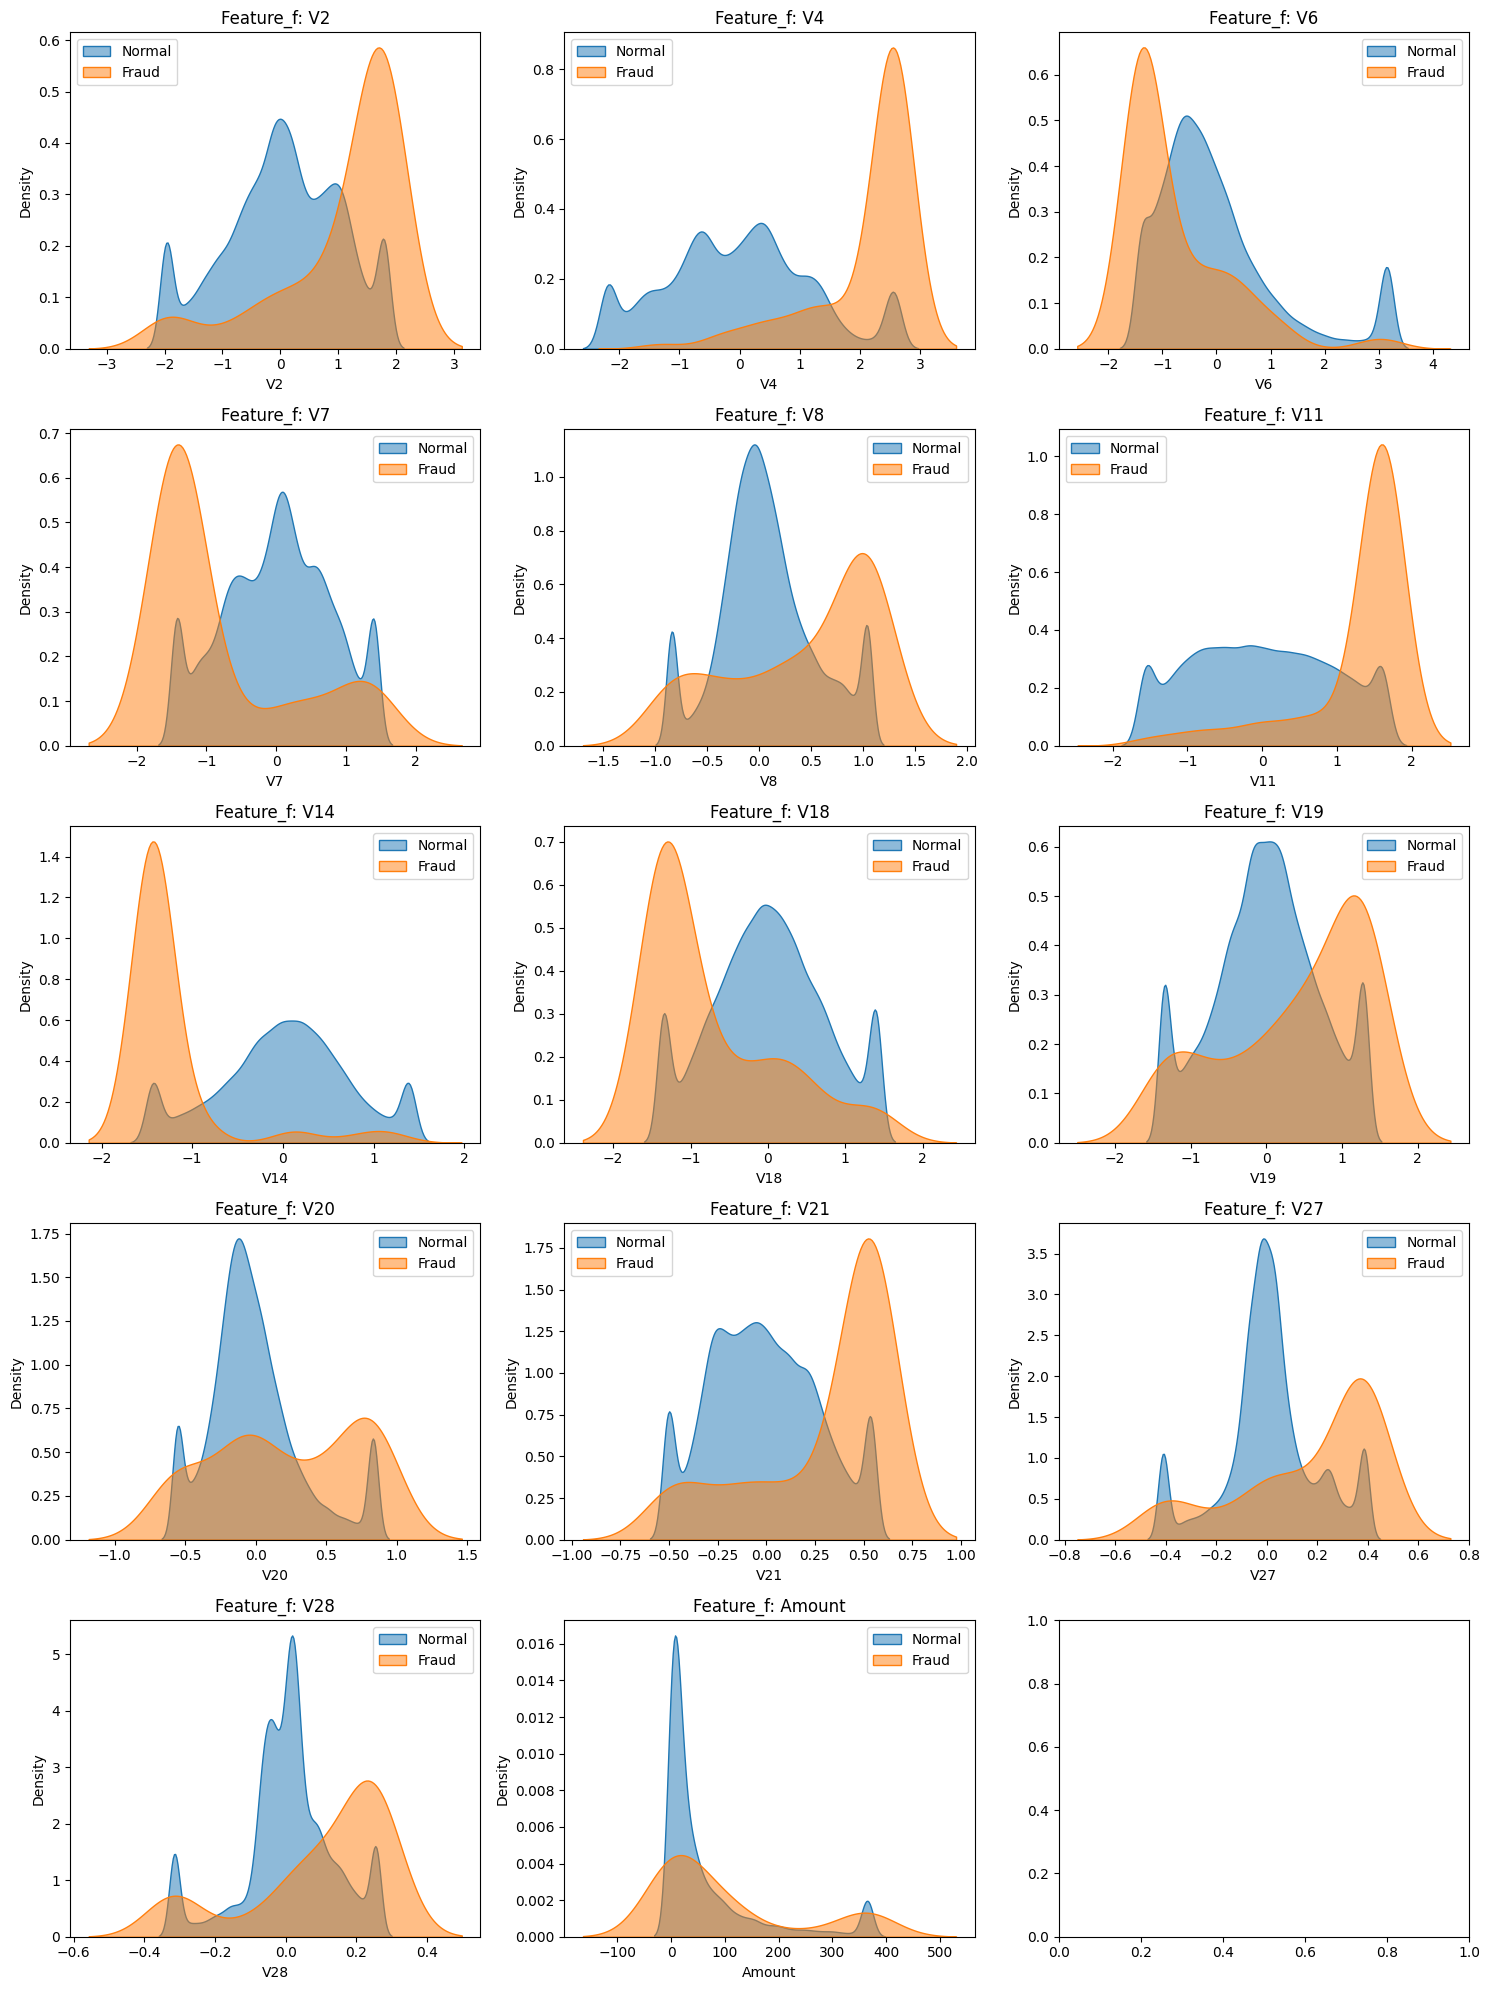

In [56]:
fig, ax = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
ax = ax.flatten()
for i, col in enumerate(cols):
    sns.kdeplot(data_val_0[col], ax=ax[i], label="Normal", fill=True, alpha=0.5)
    sns.kdeplot(data_val_1[col], ax=ax[i], label="Fraud", fill=True, alpha=0.5)
    ax[i].set_title(f"Feature_f: {col}")
    ax[i].legend()


plt.tight_layout()
plt.show()

# Importance of features with more correlation


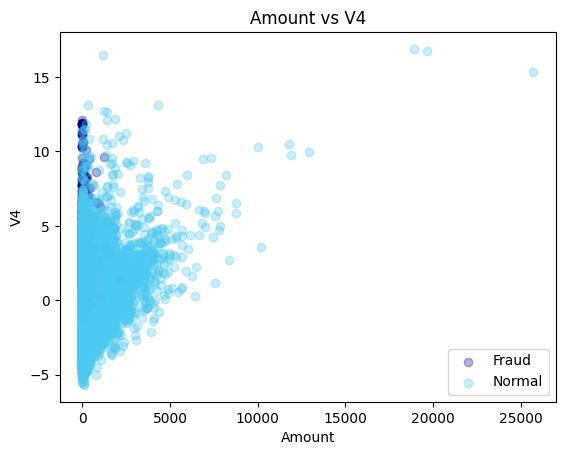

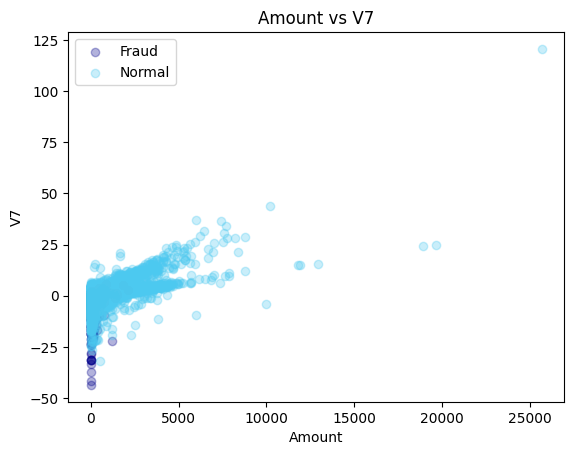

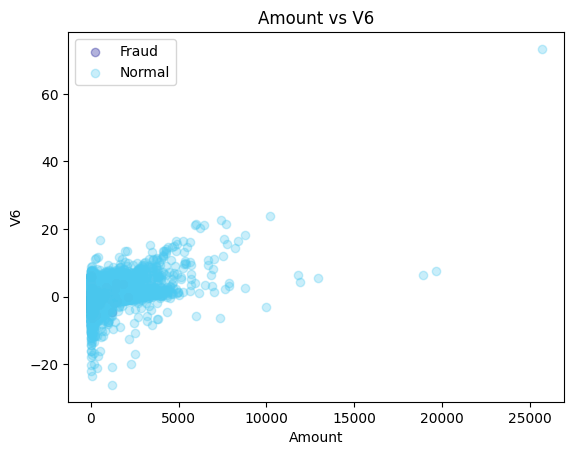

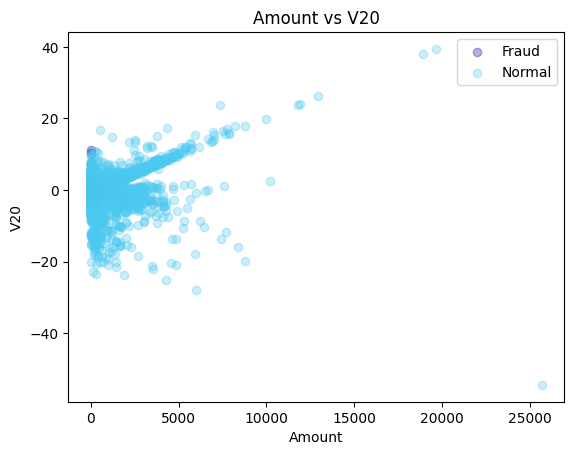

In [57]:
plt.title("Amount vs V4")
plt.xlabel("Amount")
plt.ylabel("V4")
plt.scatter(fraud.Amount, fraud.V4, color = "darkblue", label = "Fraud", alpha = 0.3)
plt.scatter(normal.Amount, normal.V4, color = "#4CC9F0", label = "Normal", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Amount vs V7")
plt.xlabel("Amount")
plt.ylabel("V7")
plt.scatter(fraud.Amount, fraud.V7, color = "darkblue", label = "Fraud", alpha = 0.3)
plt.scatter(normal.Amount, normal.V7, color = "#4CC9F0", label = "Normal", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Amount vs V6")
plt.xlabel("Amount")
plt.ylabel("V6")
plt.scatter(fraud.Amount, fraud.V6, color = "darkblue", label = "Fraud", alpha = 0.3)
plt.scatter(normal.Amount, normal.V6, color = "#4CC9F0", label = "Normal", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Amount vs V20")
plt.xlabel("Amount")
plt.ylabel("V20")
plt.scatter(fraud.Amount, fraud.V20, color = "darkblue", label = "Fraud", alpha = 0.3)
plt.scatter(normal.Amount, normal.V20, color = "#4CC9F0", label = "Normal", alpha = 0.3)
plt.legend()
plt.show()


## **Models Selected**

##Desicion Tree

In [58]:
dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [59]:
dt.fit(X_train_s, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [60]:
y_pred_dt = dt.predict(X_test_s)

In [61]:
# Accuracy on the test set
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Test Set Accuracy DT: {accuracy * 100:.2f}%")

Test Set Accuracy DT: 99.91%


### Clasification report

In [62]:
print(f" Classification report Decision Tree :\n {(classification_report(y_test, y_pred_dt, digits=3))}")

 Classification report Decision Tree :
               precision    recall  f1-score   support

           0      0.999     1.000     1.000     56656
           1      0.741     0.667     0.702        90

    accuracy                          0.999     56746
   macro avg      0.870     0.833     0.851     56746
weighted avg      0.999     0.999     0.999     56746



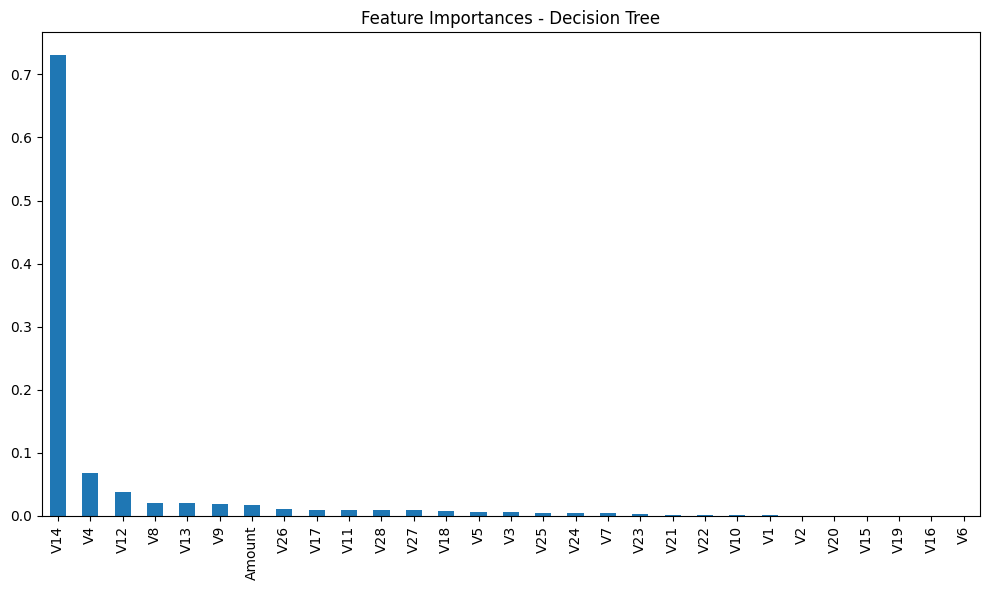

In [63]:

importances = pd.Series(dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Feature Importances - Decision Tree")
plt.tight_layout()
plt.show()

### Image Decision Tree

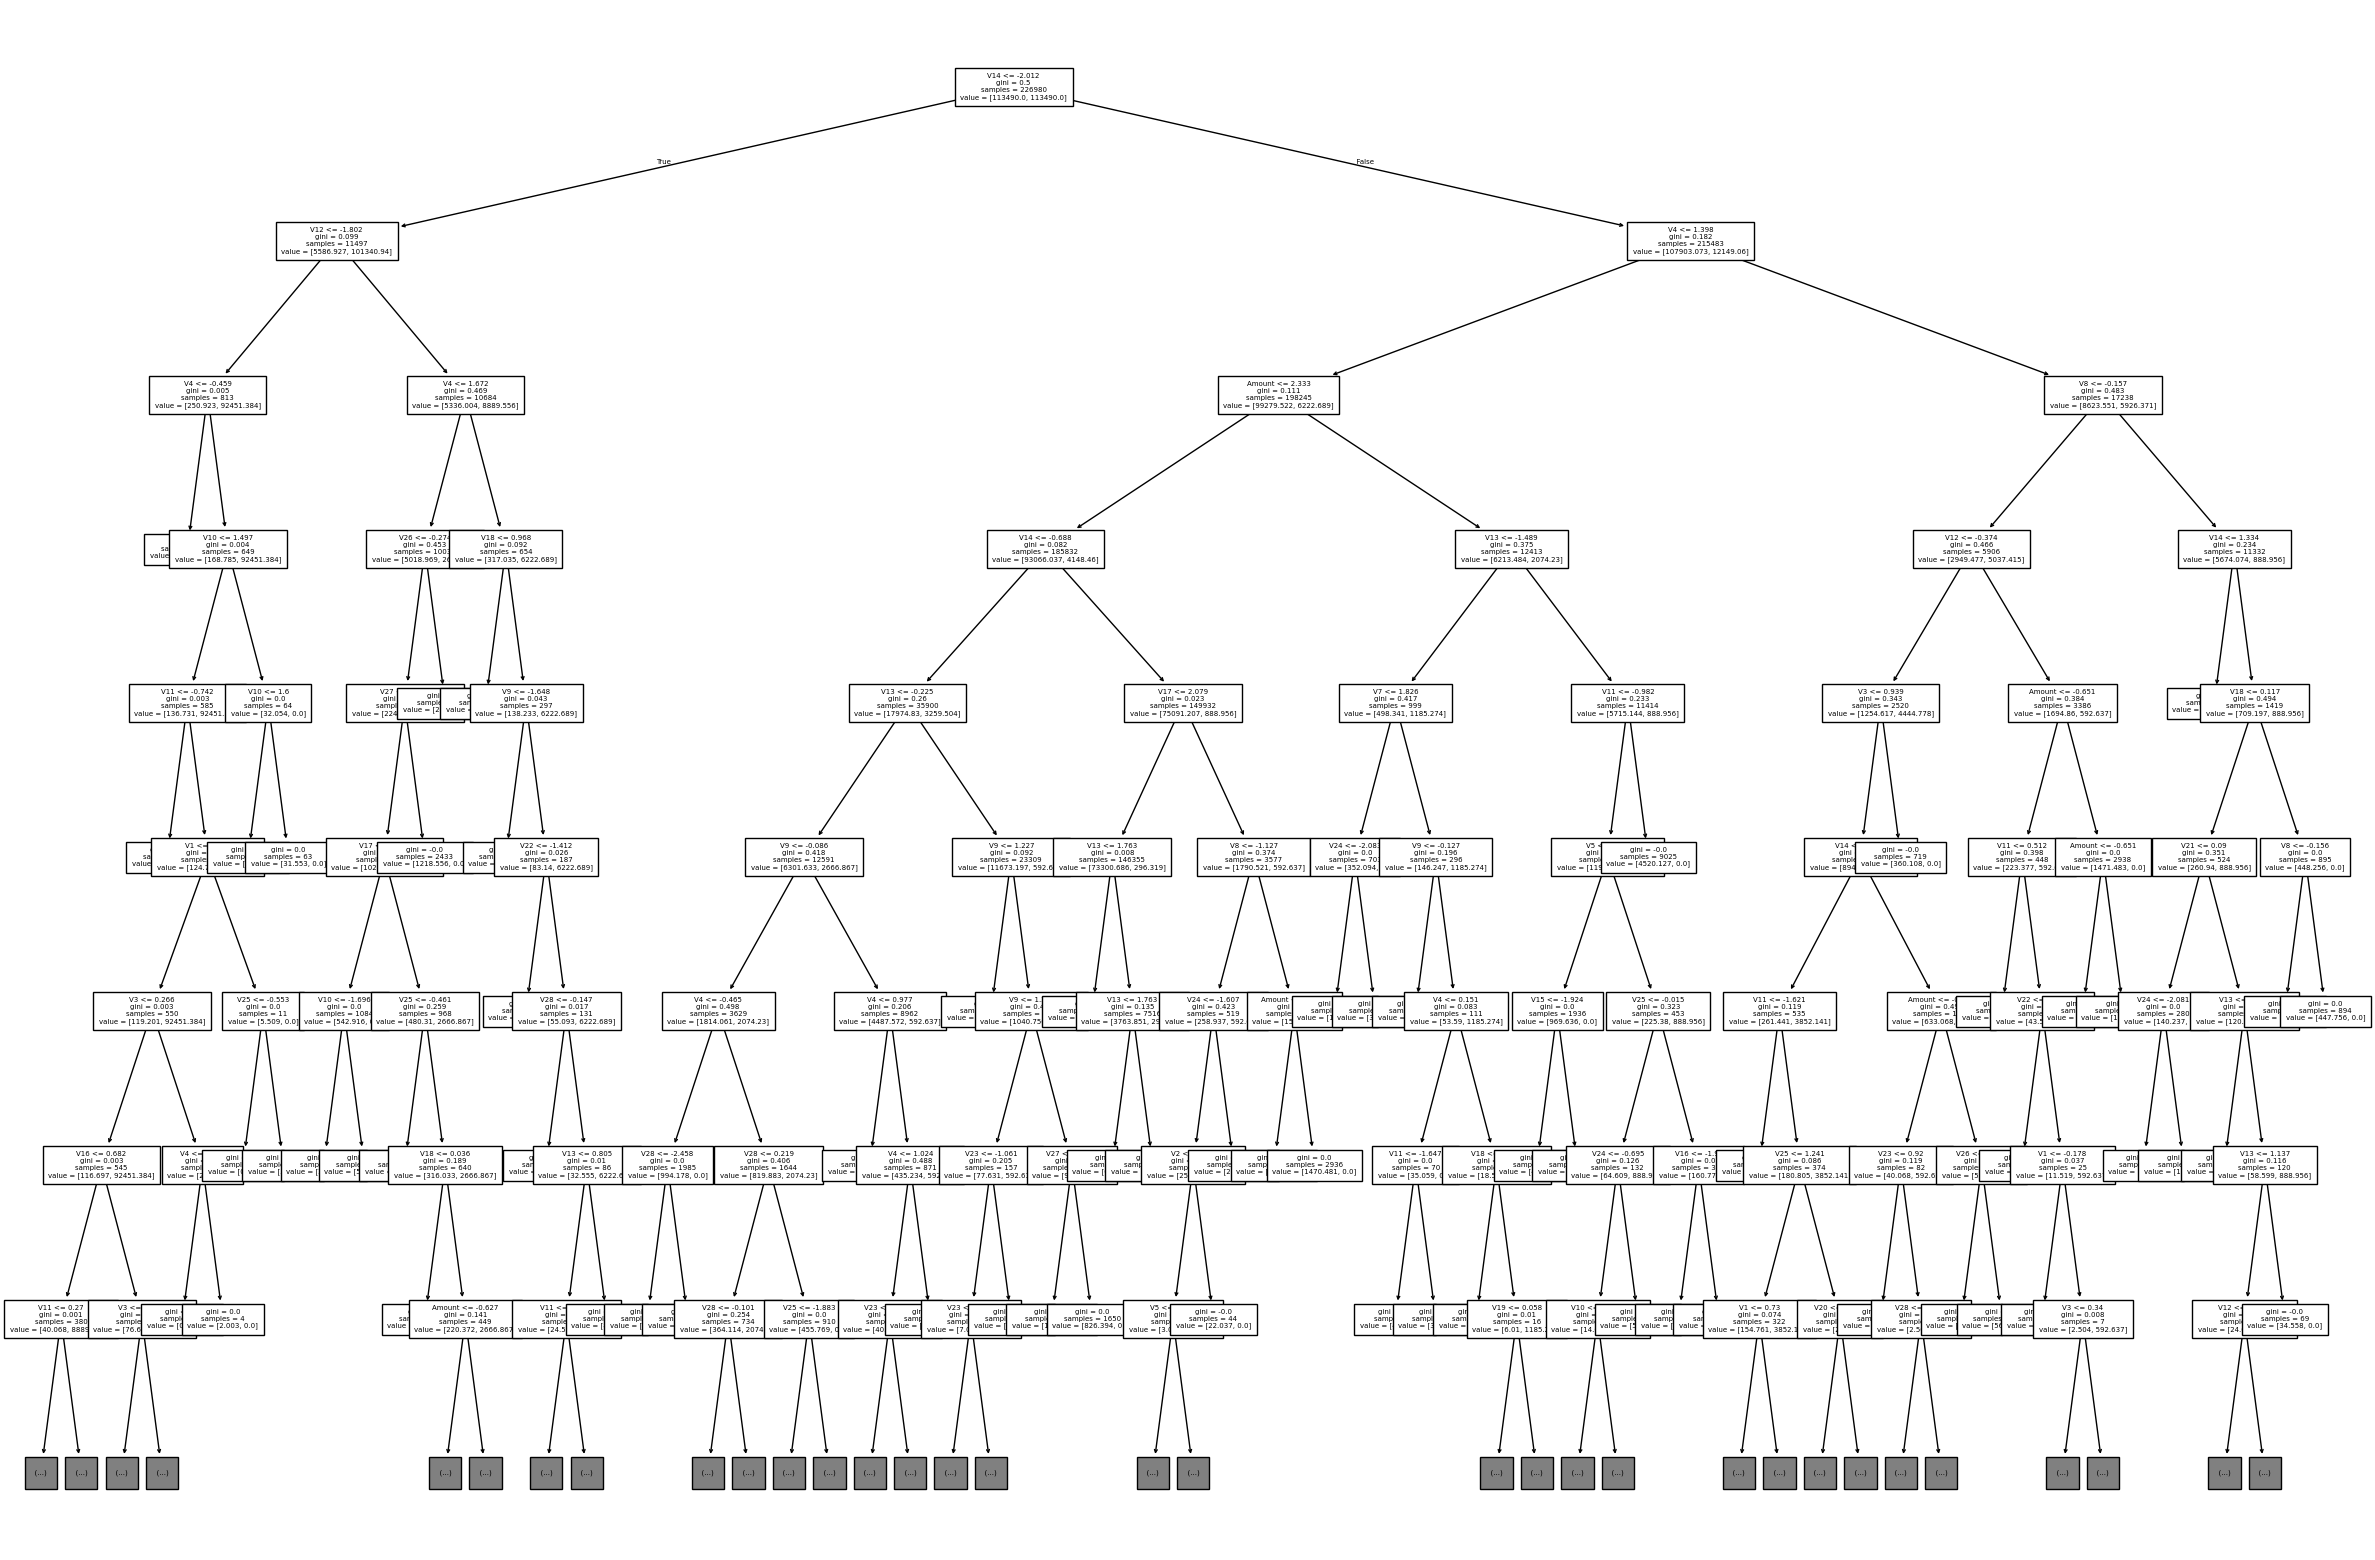

In [64]:
#Image of the Decision Tree
plt.figure(figsize=(30,20))
plot_tree(dt, max_depth=8, fontsize=5, feature_names=X.columns);

### Confusion Matrix DT

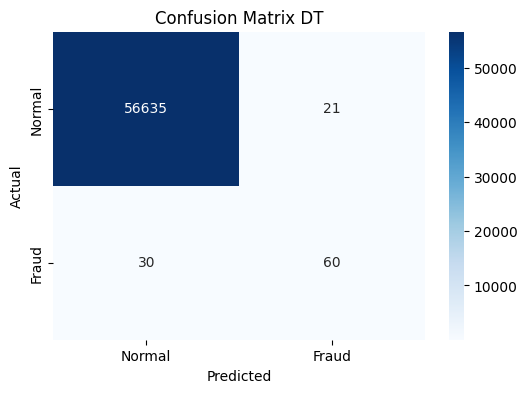

In [65]:
# Confusion matrix DT
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix DT')
plt.show()

### ROC Curve DT

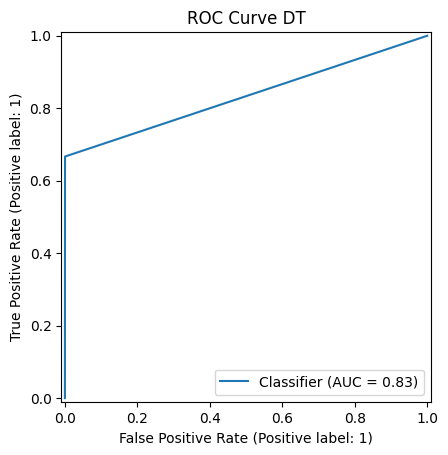

In [66]:
# Probabilities for class ('M')
y_pred_proba = dt.predict_proba(X_test_s)[:, 1]

roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba, pos_label=1)

plt.title('ROC Curve DT')
plt.show()

## Random Forest

In [67]:
rf = RandomForestClassifier(class_weight='balanced',random_state=42)

In [68]:
# Train mode
rf.fit(X_train_s, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [69]:
y_pred_rf = rf.predict(X_test_s)

In [70]:
# Accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Random Forest:{accuracy_rf * 100:.2f}%')

Accuracy Random Forest:99.95%


### Clasification report Random Forest

In [71]:
print(classification_report(y_test, y_pred_rf, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     56656
           1      0.955     0.711     0.815        90

    accuracy                          0.999     56746
   macro avg      0.977     0.856     0.908     56746
weighted avg      0.999     0.999     0.999     56746



In [107]:
cm_svm = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm_svm)

[[56527   129]
 [   21    69]]


### Confusion Matrix Random Forest

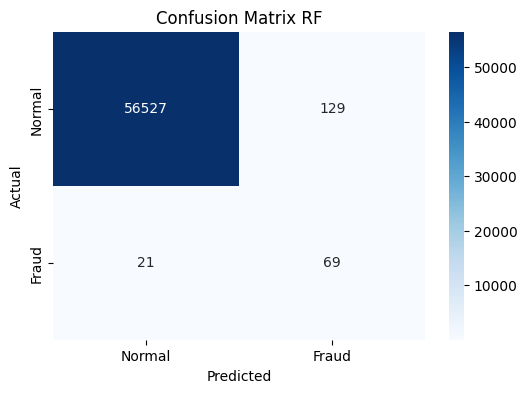

In [108]:
# Confusion matrix RF
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix RF')
plt.show()

### ROC Curve Random Forest

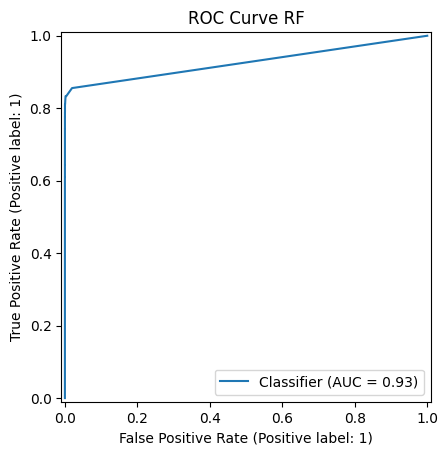

In [74]:
# Probabilities for class ('Fraud')
y_pred_proba = rf.predict_proba(X_test_s)[:, 1]

roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba, pos_label=1)

plt.title('ROC Curve RF')
plt.show()

In [75]:
X_train_s = pd.DataFrame(X_train_s, columns=X.columns)

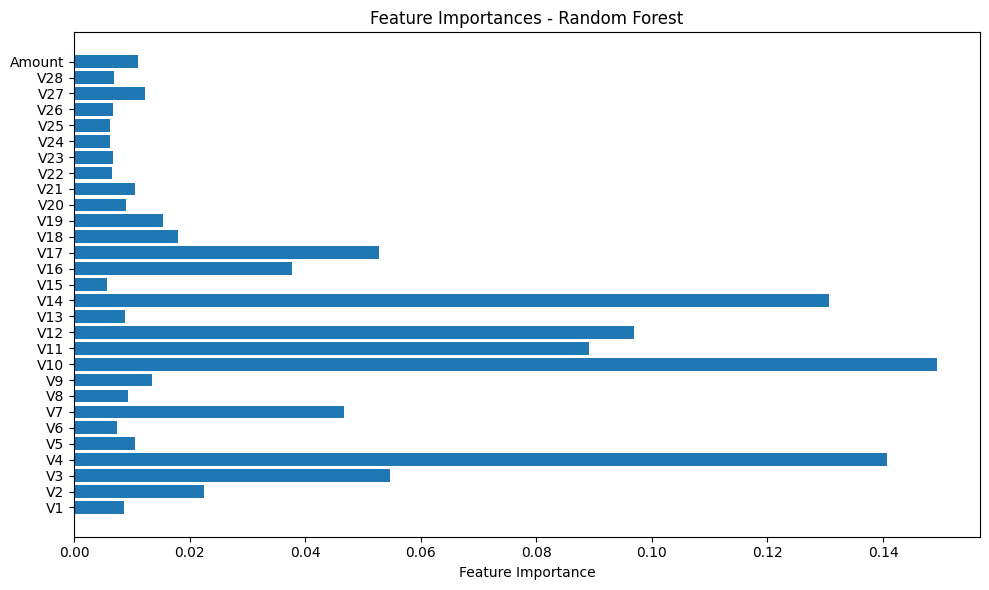

In [76]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

## SVM

In [77]:
svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)

In [78]:
# Train
svm.fit(X_train_s, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [79]:
y_pred_svm = svm.predict(X_test_s)

In [80]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Set Accuracy: {accuracy_svm * 100:.2f}%")

SVM Test Set Accuracy: 99.78%


### Classification report SVM

In [81]:
print(classification_report(y_test, y_pred_svm, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.998     0.999     56656
           1      0.399     0.789     0.530        90

    accuracy                          0.998     56746
   macro avg      0.699     0.894     0.764     56746
weighted avg      0.999     0.998     0.998     56746



In [82]:
cm_svm = metrics.confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[56549   107]
 [   19    71]]


### Confusion Matrix SVM

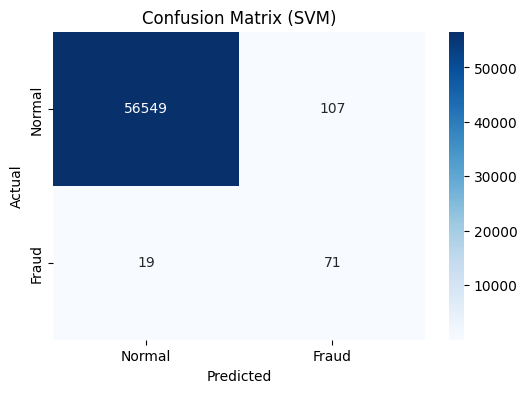

In [83]:
plt.figure(figsize=(6,4))
cm = cm_svm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (SVM)')
plt.show()

### ROC Curve SVM

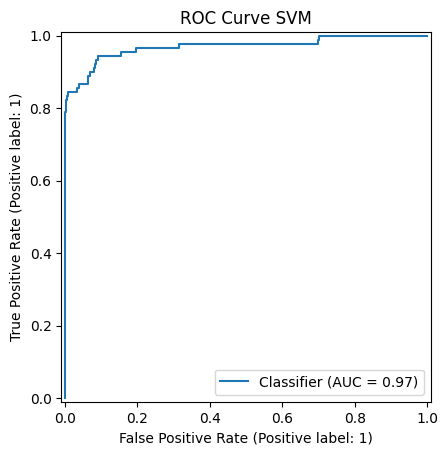

In [84]:
# Probabilities for class ('F')
y_pred_proba= svm.predict_proba(X_test_s)[:, 1]

roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba, pos_label=1)

plt.title('ROC Curve SVM')
plt.show()

# SMOTE

## Decision Tree

In [86]:
# Train on SMOTEd data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [87]:
# Predict on original test set
y_pred_dt = dt.predict(X_test_s)

In [88]:
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Classification report Decision Tree:\n{classification_report(y_test, y_pred_dt, digits=3)}")
print(f"Test Set Accuracy DT: {accuracy * 100:.2f}%")

Classification report Decision Tree:
              precision    recall  f1-score   support

           0      1.000     0.998     0.999     56656
           1      0.348     0.767     0.479        90

    accuracy                          0.997     56746
   macro avg      0.674     0.882     0.739     56746
weighted avg      0.999     0.997     0.998     56746

Test Set Accuracy DT: 99.74%


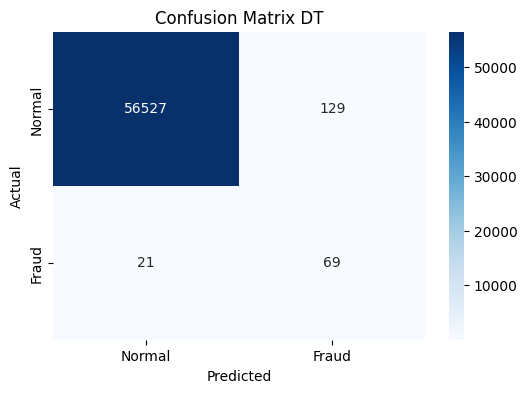

In [90]:
# Confusion matrix DT
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix DT')
plt.show()

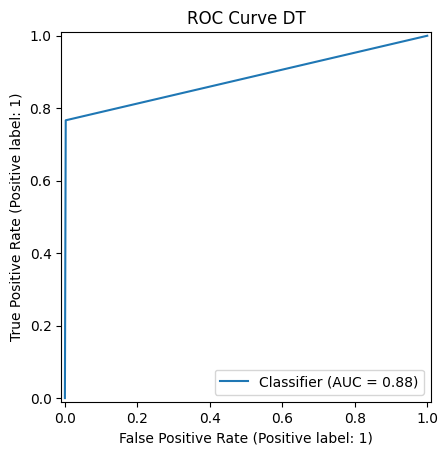

In [89]:
# ROC Curve
y_pred_proba = dt.predict_proba(X_test_s)[:, 1]
roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba, pos_label=1)
plt.title('ROC Curve DT')
plt.show()

## Random Forest

In [91]:
rf = RandomForestClassifier(random_state=42)

In [92]:
# Train mode
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [93]:
# Predict on original test set
y_pred_rf = dt.predict(X_test_s)

In [94]:
# Accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Random Forest:{accuracy_rf * 100:.2f}%')

Accuracy Random Forest:99.74%


In [95]:
print(classification_report(y_test, y_pred_rf, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.998     0.999     56656
           1      0.348     0.767     0.479        90

    accuracy                          0.997     56746
   macro avg      0.674     0.882     0.739     56746
weighted avg      0.999     0.997     0.998     56746



In [96]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Random Forest:\n", cm)

Confusion Matrix Random Forest:
 [[56527   129]
 [   21    69]]


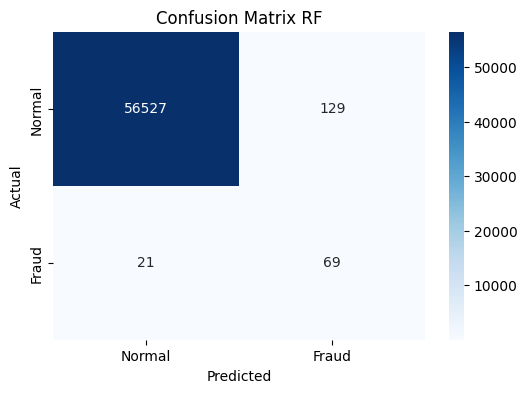

In [97]:
# Confusion matrix RF
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix RF')
plt.show()

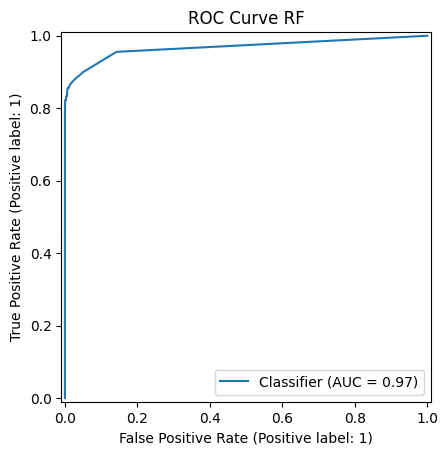

In [98]:
# Probabilities for class ('M')
y_pred_proba = rf.predict_proba(X_test_s)[:, 1]

roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba, pos_label=1)

plt.title('ROC Curve RF')
plt.show()

## SVM

In [99]:
svm = SVC(kernel='rbf', probability=True, random_state=42)

In [100]:
# Train
svm.fit(X_train_resampled, y_train_resampled)

SVC(probability=True, random_state=42)

In [101]:
y_pred_svm = svm.predict(X_test_s)

In [102]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Set Accuracy: {accuracy_svm * 100:.2f}%")

SVM Test Set Accuracy: 99.77%


In [103]:
print(classification_report(y_test, y_pred_svm, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.998     0.999     56656
           1      0.389     0.800     0.524        90

    accuracy                          0.998     56746
   macro avg      0.694     0.899     0.761     56746
weighted avg      0.999     0.998     0.998     56746



In [104]:
cm_svm = metrics.confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[56543   113]
 [   18    72]]


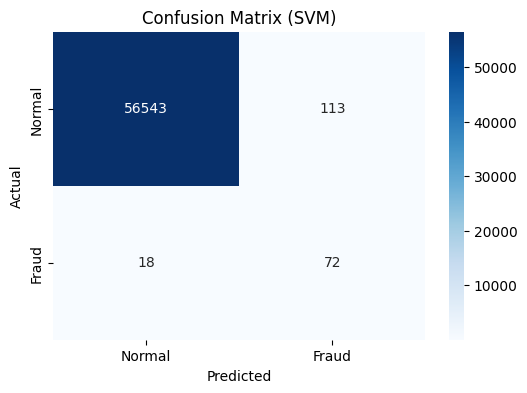

In [105]:
plt.figure(figsize=(6,4))
cm = cm_svm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (SVM)')
plt.show()

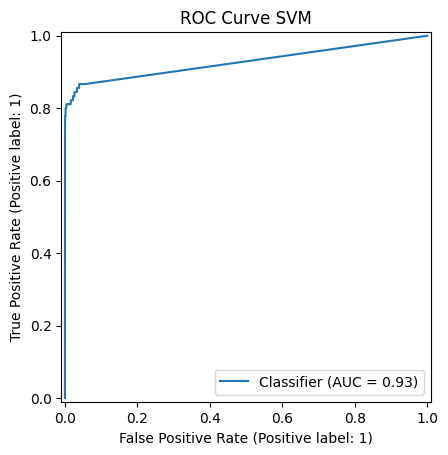

In [106]:
# Probabilities for class ('M')
y_pred_proba= svm.predict_proba(X_test_s)[:, 1]

roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba, pos_label=1)

plt.title('ROC Curve SVM')
plt.show()